<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S9/Quiz9/Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
from pytz import timezone
format = "%Y-%m-%d %H:%M:%S %Z%z"
# Current time in UTC
now_utc = datetime.now(timezone('UTC'))
print(now_utc.strftime(format))
# Convert to Asia/Kolkata time zone
now_asia = now_utc.astimezone(timezone('Asia/Kolkata'))
print(now_asia.strftime(format))


2020-03-21 17:41:17 UTC+0000
2020-03-21 23:11:17 IST+0530


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Quiz9/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Quiz9


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [4]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


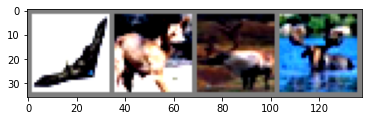

In [5]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import QuizDNN

# Model parameters

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = QuizDNN.QuizDNN().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,584
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]         147,584
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]         147,584
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [10]:
epochs = 20

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  scheduler.step()
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.2711777687072754 Batch_id=781 Accuracy=54.22: 100%|██████████| 782/782 [00:36<00:00, 21.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0242, Accuracy: 4873/10000 (48.73%)



Epoch= 1 Loss=0.6103993654251099 Batch_id=781 Accuracy=70.77: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0256, Accuracy: 5328/10000 (53.28%)



Epoch= 2 Loss=0.4644286632537842 Batch_id=781 Accuracy=77.05: 100%|██████████| 782/782 [00:36<00:00, 21.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0234, Accuracy: 5584/10000 (55.84%)



Epoch= 3 Loss=0.1664414405822754 Batch_id=781 Accuracy=80.93: 100%|██████████| 782/782 [00:36<00:00, 21.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0157, Accuracy: 6725/10000 (67.25%)



Epoch= 4 Loss=0.4464455842971802 Batch_id=781 Accuracy=83.54: 100%|██████████| 782/782 [00:36<00:00, 21.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0158, Accuracy: 6940/10000 (69.40%)



Epoch= 5 Loss=0.4188934862613678 Batch_id=781 Accuracy=85.42: 100%|██████████| 782/782 [00:36<00:00, 21.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0178, Accuracy: 6690/10000 (66.90%)



Epoch= 6 Loss=0.07434689998626709 Batch_id=781 Accuracy=90.21: 100%|██████████| 782/782 [00:36<00:00, 21.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8585/10000 (85.85%)



Epoch= 7 Loss=0.345688134431839 Batch_id=781 Accuracy=91.47: 100%|██████████| 782/782 [00:36<00:00, 21.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 8446/10000 (84.46%)



Epoch= 8 Loss=0.41257643699645996 Batch_id=781 Accuracy=92.14: 100%|██████████| 782/782 [00:36<00:00, 21.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8349/10000 (83.49%)



Epoch= 9 Loss=0.5697872042655945 Batch_id=781 Accuracy=92.92: 100%|██████████| 782/782 [00:36<00:00, 21.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 8245/10000 (82.45%)



Epoch= 10 Loss=0.2197255790233612 Batch_id=781 Accuracy=93.41: 100%|██████████| 782/782 [00:36<00:00, 21.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0106, Accuracy: 7874/10000 (78.74%)



Epoch= 11 Loss=0.2730891704559326 Batch_id=781 Accuracy=93.82: 100%|██████████| 782/782 [00:36<00:00, 21.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0090, Accuracy: 8174/10000 (81.74%)



Epoch= 12 Loss=0.0176866352558136 Batch_id=781 Accuracy=95.63: 100%|██████████| 782/782 [00:36<00:00, 21.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8757/10000 (87.57%)



Epoch= 13 Loss=0.0526692271232605 Batch_id=781 Accuracy=96.09: 100%|██████████| 782/782 [00:36<00:00, 21.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8772/10000 (87.72%)



Epoch= 14 Loss=0.23706050217151642 Batch_id=781 Accuracy=96.34: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8784/10000 (87.84%)



Epoch= 15 Loss=0.14448295533657074 Batch_id=781 Accuracy=96.39: 100%|██████████| 782/782 [00:36<00:00, 21.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8738/10000 (87.38%)



Epoch= 16 Loss=0.042295560240745544 Batch_id=781 Accuracy=96.68: 100%|██████████| 782/782 [00:36<00:00, 21.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8727/10000 (87.27%)



Epoch= 17 Loss=0.14701016247272491 Batch_id=781 Accuracy=96.80: 100%|██████████| 782/782 [00:36<00:00, 21.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8757/10000 (87.57%)



Epoch= 18 Loss=0.4122362732887268 Batch_id=781 Accuracy=97.12: 100%|██████████| 782/782 [00:36<00:00, 21.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8782/10000 (87.82%)



Epoch= 19 Loss=0.2572978436946869 Batch_id=781 Accuracy=97.12: 100%|██████████| 782/782 [00:36<00:00, 21.15it/s]



Validation set: Average loss: 0.0059, Accuracy: 8769/10000 (87.69%)



# Result visualization

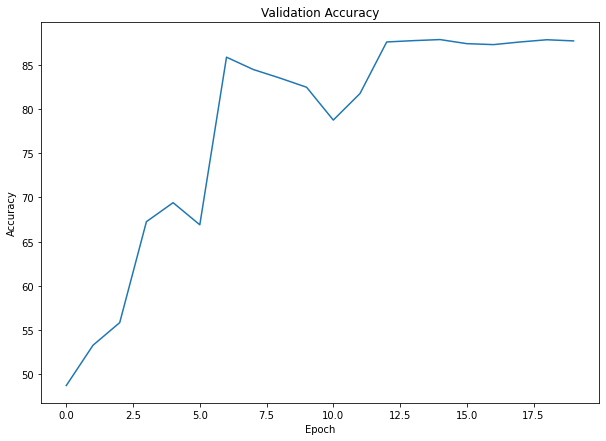

In [11]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/Quiz9/validation_accuracy.jpg')

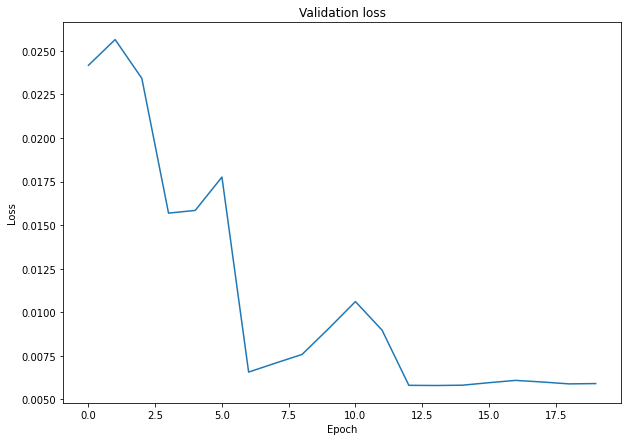

In [12]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/Quiz9/validation_loss.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse horse  frog  bird


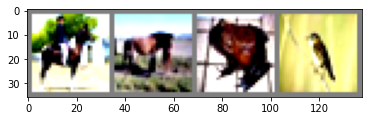

In [13]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse horse  frog  bird


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [16]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 51.04it/s]


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 74 %
Accuracy of   cat : 68 %
Accuracy of  deer : 85 %
Accuracy of   dog : 82 %
Accuracy of  frog : 90 %
Accuracy of horse : 93 %
Accuracy of  ship : 93 %
Accuracy of truck : 95 %
